In [1]:
#DOING MY PYTHON IMPORTS
import matplotlib.pyplot as plt
import numpy
import random
%matplotlib inline

In [2]:
#DEFINING SOME FUNCTIONS
def resample(array):
    n = len(array)
    return numpy.random.choice(array, n, replace = True)

def performBootstrap(array, iterations):
    collector = []
    for i in range(iterations):
        newResample = resample(array)
        mean = numpy.mean(newResample)
        collector.append(mean)
    return collector

def injectOutlier(array, mean, standardDeviation, severity, high = None, injectPosition = None):
    #This will take in some array as well as a mean and standard deviation and replace one of the values with an extreme outlier.
    #The number of standard deviations for the outlier, the direction, and the position can all be set.
    newArray = array.copy()
    if injectPosition is None:
        injectPosition = random.randint(0,len(newArray))
    outlierDelta = standardDeviation * severity
    if high is None:
        high = random.randint(0,2)
    if high:
        outlier = mean + outlierDelta
    else:
        outlier = mean - outlierDelta
    newArray[injectPosition] = outlier
    print("Injected an outlier value of %s at index %s" %(outlier, injectPosition))
    return newArray

In [3]:
#DEFINING SOME PARAMETERS AND CREATING MY DISTRIBUTION
bootstrapIterations = 10000
mean = 0
standardDeviation = 0.1
n = 1000
distribution = numpy.random.normal(mean, standardDeviation, n)

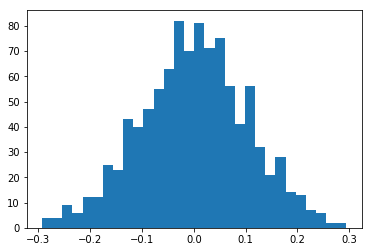

In [4]:
count, bins, ignored = plt.hist(distribution, 30)

(array([   3.,    6.,   25.,   31.,   57.,  104.,  162.,  243.,  408.,
         505.,  679.,  767.,  940.,  937.,  989.,  914.,  859.,  688.,
         537.,  386.,  293.,  184.,  115.,   68.,   50.,   26.,   12.,
           5.,    4.,    3.]),
 array([ -1.12634886e-02,  -1.04585268e-02,  -9.65356500e-03,
         -8.84860319e-03,  -8.04364139e-03,  -7.23867959e-03,
         -6.43371779e-03,  -5.62875599e-03,  -4.82379418e-03,
         -4.01883238e-03,  -3.21387058e-03,  -2.40890878e-03,
         -1.60394698e-03,  -7.98985175e-04,   5.97662739e-06,
          8.10938429e-04,   1.61590023e-03,   2.42086203e-03,
          3.22582384e-03,   4.03078564e-03,   4.83574744e-03,
          5.64070924e-03,   6.44567104e-03,   7.25063285e-03,
          8.05559465e-03,   8.86055645e-03,   9.66551825e-03,
          1.04704801e-02,   1.12754419e-02,   1.20804037e-02,
          1.28853655e-02]),
 <a list of 30 Patch objects>)

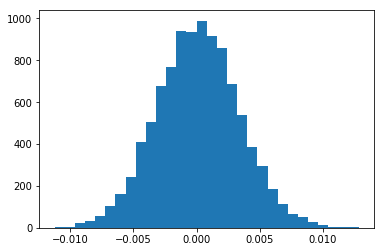

In [5]:
#BOOTSTRAPPING WITH 10K ITERATIONS
bootstrap = performBootstrap(distribution, bootstrapIterations)
plt.hist(bootstrap, 30)

Injected an outlier value of 10.0 at index 274


(array([  39.,  161.,  355.,  320.,  109.,   15.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([ -0.29290728,  -0.1899782 ,  -0.08704913,   0.01587994,
          0.11880902,   0.22173809,   0.32466716,   0.42759623,
          0.53052531,   0.63345438,   0.73638345,   0.83931253,
          0.942241

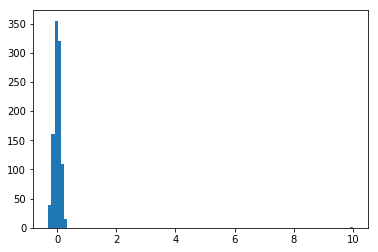

In [6]:
#MAKING MY DISTRIBUTION GAIN A SERIOUS OUTLIER
distributionWithOutlier = injectOutlier(distribution, mean, standardDeviation, 100)
plt.hist(distributionWithOutlier, 100)

(array([   4.,    5.,    8.,   13.,   28.,   34.,   57.,  100.,  132.,
         179.,  226.,  266.,  305.,  313.,  361.,  323.,  325.,  280.,
         253.,  211.,  195.,  191.,  242.,  245.,  276.,  304.,  332.,
         353.,  311.,  310.,  329.,  250.,  200.,  199.,  142.,  135.,
         138.,  149.,  134.,  156.,  159.,  176.,  149.,  165.,  146.,
         141.,   96.,   76.,   73.,   54.,   42.,   63.,   50.,   49.,
          51.,   63.,   61.,   52.,   44.,   37.,   26.,   18.,   15.,
          12.,   11.,   14.,   13.,   13.,    8.,   11.,   16.,    9.,
          12.,   13.,    6.,    8.,    6.,    0.,    5.,    2.,    3.,
           3.,    2.,    3.,    2.,    1.,    1.,    2.,    1.,    1.,
           0.,    0.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([-0.01039545, -0.009661  , -0.00892656, -0.00819211, -0.00745767,
        -0.00672322, -0.00598878, -0.00525433, -0.00451989, -0.00378544,
        -0.003051  , -0.00231655, -0.00158211, -0.00084766, -0.0

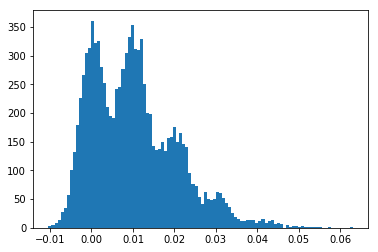

In [7]:
#RERUNNING THE BOOTSTRAP WITH THE OUTLIER IN THE DISTRIBUTION
bootstrapWithOutlier = performBootstrap(distributionWithOutlier, bootstrapIterations)
plt.hist(bootstrapWithOutlier, 100)